<a href="https://colab.research.google.com/github/Kishore261/MICROSOFT-STOCK-ANALYSIS/blob/main/MICROSOFT_STOCKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#numpy,pandas,matplotlib,seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [6]:
df=pd.read_csv("/Microsoft_Stock.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [8]:
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [11]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [12]:
df.shape

(1511, 6)

In [13]:
df.sample(6)

,Date,Open,High,Low,Close,Volume
20,4/30/2015 16:00:00,48.70,49.54,48.60,48.64,64725457
284,5/17/2016 16:00:00,51.72,51.73,50.36,50.51,27803514
1047,5/30/2019 16:00:00,125.26,125.76,124.78,125.73,16829613
1055,6/11/2019 16:00:00,133.88,134.24,131.28,132.10,23913731
499,3/24/2017 16:00:00,65.12,65.45,64.76,64.98,22617105
1471,2/3/2021 16:00:00,239.57,245.09,239.26,243.00,27158104


Data cleaning

In [14]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [15]:
print(df.drop_duplicates(inplace=True))

None


In [16]:
df.dropna()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [17]:
df['Close'].fillna(df['Close'].mean(),inplace=True)
df['Open'].fillna(df['Open'].mean(),inplace=True)

/tmp/ipython-input-1252895771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(df['Close'].mean(),inplace=True)
/tmp/ipython-input-1252895771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [18]:
print(df['Volume'].value_counts())

Volume
43623471    1
36865322    1
37487476    1
39223692    1
28809375    1
           ..
42387608    1
22509652    1
27343581    1
24244382    1
30276692    1
Name: count, Length: 1511, dtype: int64


In [19]:
df=df.apply(pd.to_numeric,errors='coerce')

In [20]:
print(df.corr())

        Date      Open      High       Low     Close    Volume
Date     NaN       NaN       NaN       NaN       NaN       NaN
Open     NaN  1.000000  0.999775  0.999757  0.999541  0.054072
High     NaN  0.999775  1.000000  0.999622  0.999731  0.062573
Low      NaN  0.999757  0.999622  1.000000  0.999767  0.044514
Close    NaN  0.999541  0.999731  0.999767  1.000000  0.052153
Volume   NaN  0.054072  0.062573  0.044514  0.052153  1.000000


<Axes: >

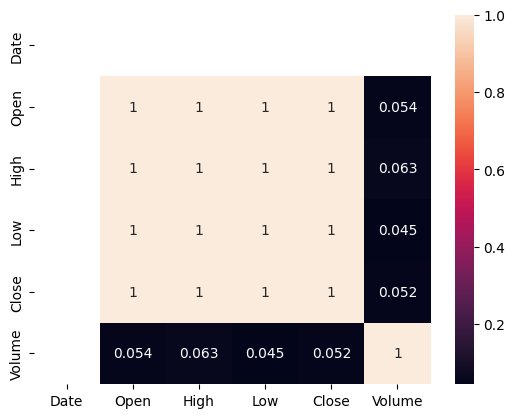

In [21]:
sns.heatmap(df.corr(),annot=True)

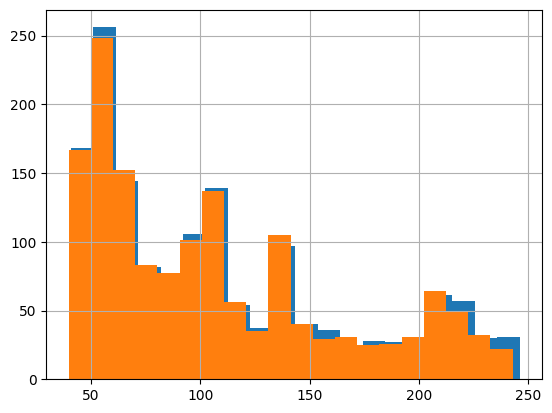

In [22]:
df['High'].hist(bins=20),df['Low'].hist(bins=20)
plt.show()

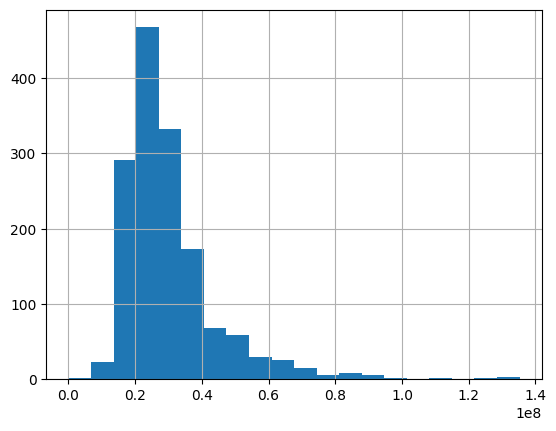

In [23]:
df['Volume'].hist(bins=20)
plt.show()

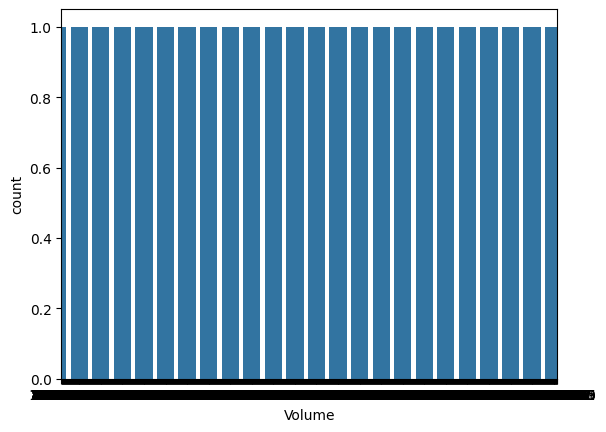

In [24]:
sns.countplot(x='Volume',data=df)
plt.show()

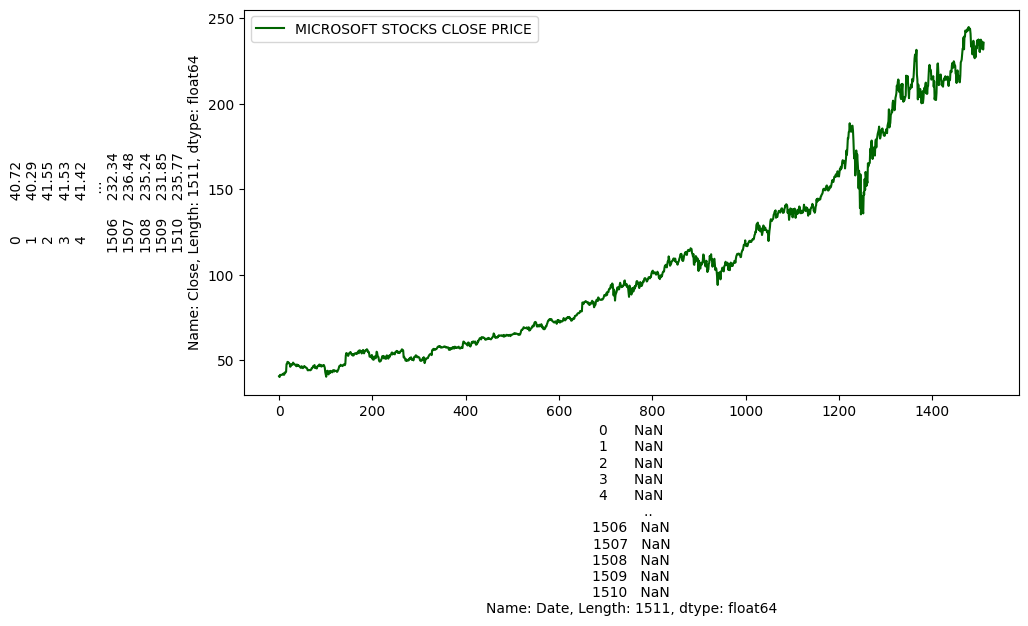

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label = 'MICROSOFT STOCKS CLOSE PRICE',color='darkgreen')
plt.xlabel(df['Date'])
plt.ylabel(df['Close'])
plt.legend()
plt.show()

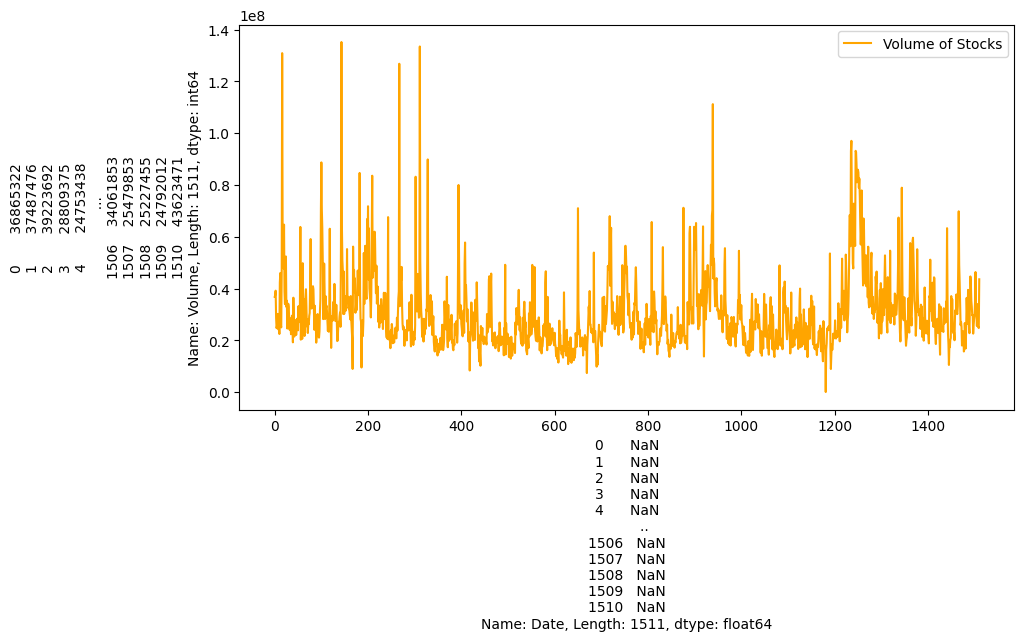

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['Volume'],label='Volume of Stocks',color='Orange')
plt.xlabel(df['Date'])
plt.ylabel(df['Volume'])
plt.legend()
plt.show()

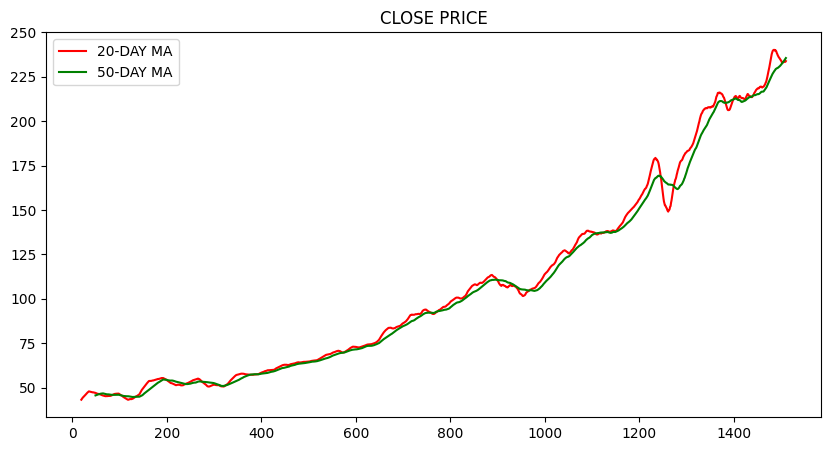

In [27]:
df['MA20']=df['Close'].rolling(window=20).mean()
df['MA50']=df['Close'].rolling(window=50).mean()
plt.figure(figsize=(10,5))
plt.plot(df['MA20'],label='20-DAY MA',color='RED')
plt.plot(df['MA50'],label='50-DAY MA',color='Green')
plt.title('CLOSE PRICE')
plt.legend()
plt.show()

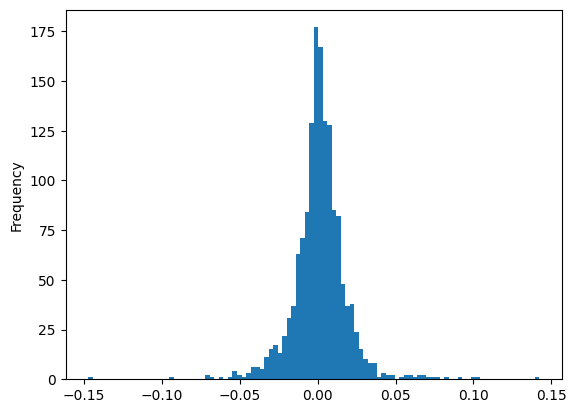

In [35]:
df['Daily Return']= df['Close'].pct_change()
df['Daily Return'].plot(kind='hist',bins=100)
plt.show()

In [37]:
volatility=df['Daily Return'].std()
np.sqrt(252)
print("Volatility :",round(volatility,2))

Volatility : 0.02


In [38]:
df['previous close']=df['Close'].shift(1)
df['previous close']

,previous close
0,NaN
1,40.72
2,40.29
3,41.55
4,41.53
...,...
1506,235.46
1507,232.34
1508,236.48
1509,235.24


In [39]:
df['price change']=df['Close']-df['previous close']
df['price change']

,price change
0,NaN
1,-0.43
2,1.26
3,-0.02
4,-0.11
...,...
1506,-3.12
1507,4.14
1508,-1.24
1509,-3.39
